In [5]:
# Exploratory Data Analysis (EDA)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
data_df = pd.read_csv("../data/data.csv")
domain_location_df = pd.read_csv("../data/domains_location.csv")

# Merge datasets for a complete view
merged_df = data_df.merge(domain_location_df, left_on='source_name', right_on='SourceCommonName', how='left')

# Display basic information about the dataset
print("Merged Data Information:")
print(merged_df.info())


Merged Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105375 entries, 0 to 105374
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   article_id        105375 non-null  int64 
 1   source_id         24495 non-null   object
 2   source_name       105375 non-null  object
 3   author            97156 non-null   object
 4   title             105335 non-null  object
 5   description       104992 non-null  object
 6   url               105375 non-null  object
 7   url_to_image      99751 non-null   object
 8   published_at      105375 non-null  object
 9   content           105375 non-null  object
 10  category          105333 non-null  object
 11  full_content      58432 non-null   object
 12  SourceCommonName  360 non-null     object
 13  location          360 non-null     object
 14  Country           360 non-null     object
dtypes: int64(1), object(14)
memory usage: 12.1+ MB
None


In [6]:
# Display the first few rows of the dataset
print("First Few Rows of Merged Data:")
print(merged_df.head())

# Summary statistics
print("Summary Statistics:")
print(merged_df.describe())

# Check for missing values
print("Missing Values:")
print(merged_df.isnull().sum())

First Few Rows of Merged Data:
   article_id source_id                   source_name  \
0       89541       NaN  International Business Times   
1       89542       NaN                    Prtimes.jp   
2       89543       NaN                      VOA News   
3       89545       NaN            The Indian Express   
4       89547       NaN           The Times of Israel   

                                       author  \
0                              Paavan MATHEMA   
1                                         NaN   
2  webdesk@voanews.com (Agence France-Presse)   
3                                   Editorial   
4                                 Jacob Magid   

                                               title  \
0  UN Chief Urges World To 'Stop The Madness' Of ...   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。   
2  UN Chief Urges World to 'Stop the Madness' of ...   
3  Sikkim warning: Hydroelectricity push must be ...   
4  200 foreigners, dual nationals cut down in Ham..

In [7]:
# Group by website and count the number of articles
article_counts = merged_df.groupby('source_name')['article_id'].count().sort_values(ascending=False)

# Top 10 websites
top_10_websites_by_articles = article_counts.head(10)

# Bottom 10 websites
bottom_10_websites_by_articles = article_counts.tail(10)
print(top_10_websites_by_articles)
print(bottom_10_websites_by_articles)

source_name
ETF Daily News        16631
The Times of India     7629
GlobeNewswire          5485
Forbes                 4423
Biztoc.com             3968
BBC News               3342
Globalsecurity.org     3093
Business Insider       2746
ABC News               2188
Marketscreener.com     1948
Name: article_id, dtype: int64
source_name
Garbageday.email              1
Pehub.com                     1
Pedestrianobservations.com    1
Pdst.fm                       1
Getresponse.com               1
Getmyboat.com                 1
Gentlemansgazette.com         1
Ox.ac.uk                      1
Gartner.com                   1
Palnws.be                     1
Name: article_id, dtype: int64


In [8]:
# Extract country information and group by country to count the domains
country_domain_counts = merged_df.groupby('Country')['SourceCommonName'].nunique().sort_values(ascending=False)

# Top 10 countries by the number of news media organizations
top_10_countries_by_media_orgs = country_domain_counts.head(10)
top_10_countries_by_media_orgs

Country
United States    14
Australia         1
France            1
Russia            1
Name: SourceCommonName, dtype: int64

In [9]:
# Convert 'full_content' to string and handle missing values
merged_df['full_content'] = merged_df['full_content'].fillna("").astype(str)

# Convert 'title' to string and handle missing values
merged_df['title'] = merged_df['title'].fillna("").astype(str)
# Count the number of words in each title
merged_df['title_word_count'] = merged_df['title'].apply(lambda x: len(x.split()))


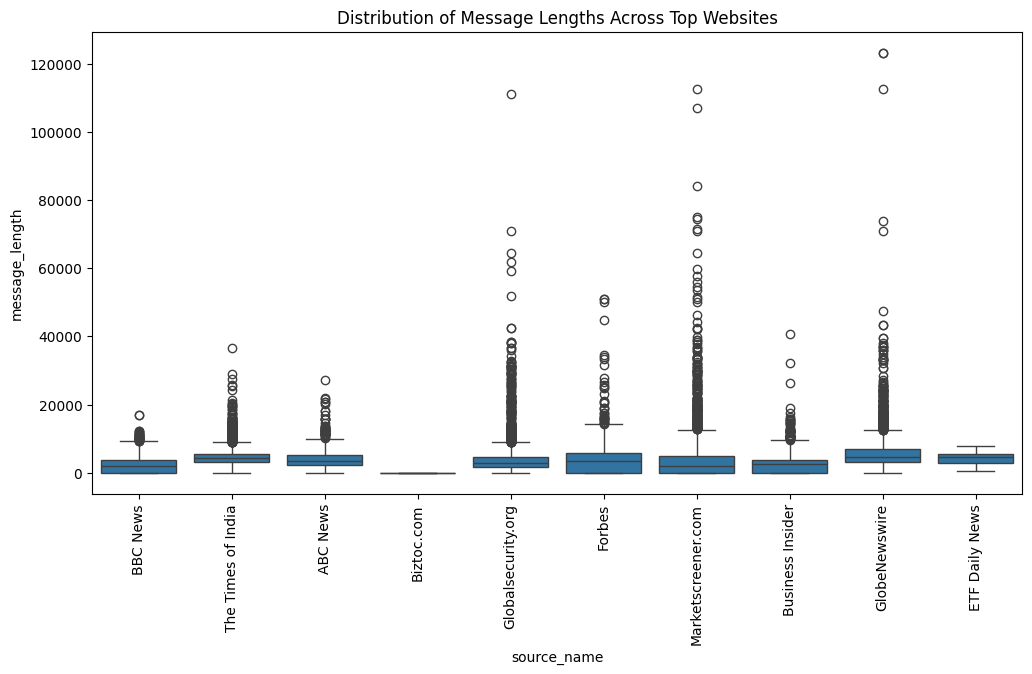

In [ ]:


# Plotting the distribution of message lengths across websites
merged_df['message_length'] = merged_df['full_content'].apply(len)

# Ensure there are no issues with categorical data or too many categories
top_sources = merged_df['source_name'].value_counts().nlargest(10).index
filtered_df = merged_df[merged_df['source_name'].isin(top_sources)]

# Boxplot for message length distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_name', y='message_length', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Distribution of Message Lengths Across Top Websites')
plt.show()




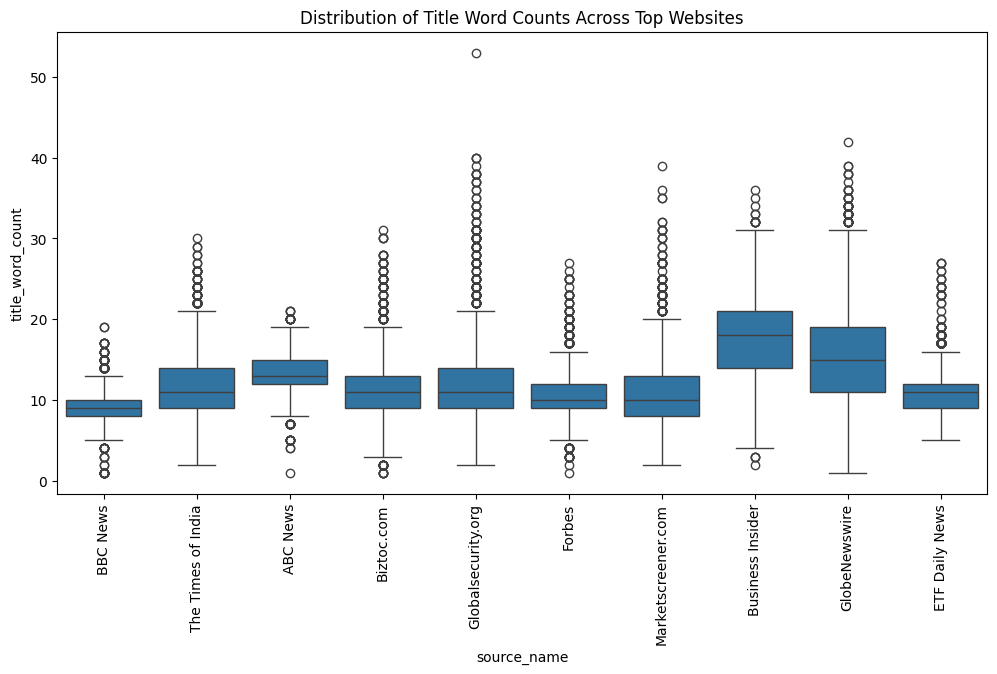

In [ ]:
# Boxplot for title word count distribution
plt.figure(figsize=(12, 6))
sns.boxplot(x='source_name', y='title_word_count', data=filtered_df)
plt.xticks(rotation=90)
plt.title('Distribution of Title Word Counts Across Top Websites')
plt.show()

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

news_df = merged_df.dropna(subset=['title'])

tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=1000)
tfidf = tfidf_vectorizer.fit_transform(news_df['title'])

nmf_model = NMF(n_components=10, random_state=1)
nmf_model.fit(tfidf)

for i, topic in enumerate(nmf_model.components_):
    print(f"Topic {i+1}:")
    print([tfidf_vectorizer.get_feature_names_out()[index] for index in topic.argsort()[-10:]])

Topic 1:
['acquires', 'purchases', 'capital', 'group', 'management', 'sold', 'llc', 'sells', 'nyse', 'shares']
Topic 2:
['investment', 'hits', 'week', 'announces', 'zealand', 'low', 'year', 'high', 'york', 'new']
Topic 3:
['10', 'announces', 'reports', 'financial', 'november', 'october', 'best', 'quarter', 'results', '2023']
Topic 4:
['ukraine', 'biden', 'iran', 'conflict', 'attack', 'israeli', 'war', 'hamas', 'gaza', 'israel']
Topic 5:
['investment', '000', 'capital', 'million', 'management', 'llc', 'position', 'holdings', 'nyse', 'stock']
Topic 6:
['report', 'reach', '2032', 'research', 'size', 'usd', 'cagr', 'global', 'billion', 'market']
Topic 7:
['hold', 'buy', 'group', 'earnings', 'analysts', 'coverage', 'rating', 'stocknews', 'com', 'nasdaq']
Topic 8:
['win', 'england', 'south', 'africa', 'final', 'australia', 'cricket', 'india', 'cup', 'world']
Topic 9:
['help', 'president', 'uk', 'russia', 'generative', 'google', 'ukraine', 'china', 'says', 'ai']
Topic 10:
['given', 'cut', 'av

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from textblob import TextBlob
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis to the 'title' column
news_df['title_sentiment'] = news_df['title'].apply(get_sentiment)

# Categorize sentiment as positive, neutral, or negative
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

news_df['title_sentiment_category'] = news_df['title_sentiment'].apply(categorize_sentiment)

print(news_df[['title', 'title_sentiment', 'title_sentiment_category']].head())
X = tfidf
y = news_df['title_sentiment_category']


# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a model
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Evaluate the model
accuracy = model.score(X_test, y_test)
print(f"Model Accuracy: {accuracy:.2f}")

                                               title  title_sentiment  \
0  UN Chief Urges World To 'Stop The Madness' Of ...         0.000000   
1              RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。         0.000000   
2  UN Chief Urges World to 'Stop the Madness' of ...         0.000000   
3  Sikkim warning: Hydroelectricity push must be ...         0.000000   
4  200 foreigners, dual nationals cut down in Ham...        -0.155556   

  title_sentiment_category  
0                  neutral  
1                  neutral  
2                  neutral  
3                  neutral  
4                 negative  
Model Accuracy: 0.82
